In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

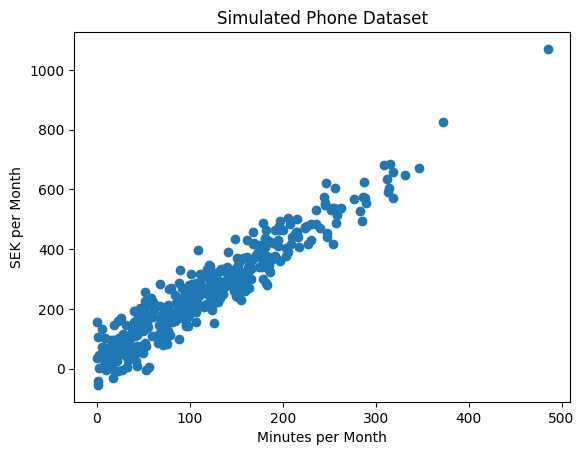

In [113]:
np.random.seed(42)

# simulate x-values
X = np.abs(np.random.normal(loc=100, scale=100, size=400))

# simulate noise values
noise = np.random.normal(loc=0, scale=50, size=400)

# plot the simulated dataset
y = 2 * X + 25 + noise

plt.scatter(X, y)
plt.title('Simulated Phone Dataset')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.show()


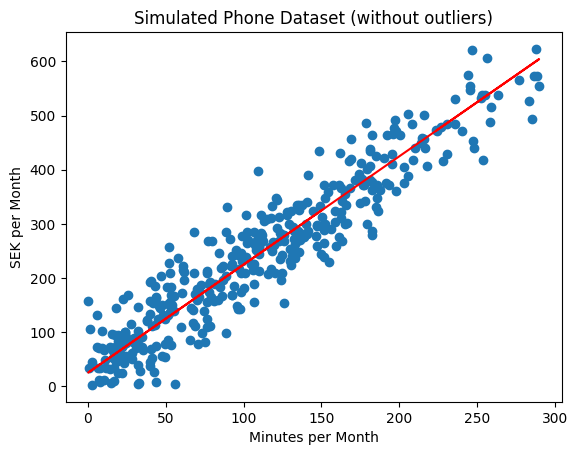

In [114]:
# remove outliers
mask = (X <= 300) & (y >= 0)
X = X[mask]
y = y[mask]

# plot the new dataset and ground truth
plt.scatter(X, y)
plt.plot(X, 2 * X + 25, color='red')
plt.title('Simulated Phone Dataset (without outliers)')
plt.xlabel('Minutes per Month')
plt.ylabel('SEK per Month')
plt.show()

In [115]:
# insert values into DataFrame
df = pd.DataFrame({'Minutes': X, 'Cost': y})
X.shape, y.shape # X.shape = (381,) y.shape = (381,)
df.head()

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [116]:
# create a function to train|test split the data
def train_test_split(X, y, train_fraction = 0.7, random_state = 42, replace = False):

    np.random.seed(random_state)
    # create a random permutation of the indices
    # what permutation does is it shuffles the indices
    indices = np.random.permutation(len(X))
    # calculate the number of training samples
    train_size = int(len(X) * train_fraction) # 70% of the indices
    # create the training and test indices
    train_indices = indices[:train_size] # 0 to 70% of the indices
    test_indices = indices[train_size:] # 70% to 100% of the indices
    # create the training and test sets
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    print(f'{train_indices.shape=}, {test_indices.shape=}')
    print(f'{X_train.shape=}, {y_train.shape=}, {X_test.shape=}, {y_test.shape=}')
    return X_train, X_test, y_train, y_test

In [120]:
train_test_split(X, y);

train_indices.shape=(266,), test_indices.shape=(115,)
X_train.shape=(266,), y_train.shape=(266,), X_test.shape=(115,), y_test.shape=(115,)
